In [128]:
#Made with the help of previous learning from kaggle competition, namely house price predictions,binary predictions and forecasting sticker sales
#used claude to improve the code and get rid of some errors

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

In [130]:
#Task 1-Data Loading and exploration

df = pd.read_csv('customer_churn_data.csv')
print(f"This means we have {df.shape[0]:,} customers and {df.shape[1]} features about each customer")

This means we have 10,000 customers and 24 features about each customer


In [131]:
print("Some basic info")
df.info()
print("-" * 35)
for i, (col, dtype) in enumerate(zip(df.columns, df.dtypes)):
    print(f"{i+1:2d}. {col:<20} - {dtype}")

Some basic info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_id            10000 non-null  object 
 1   age                    10000 non-null  int64  
 2   gender                 10000 non-null  object 
 3   senior_citizen         10000 non-null  int64  
 4   partner                10000 non-null  object 
 5   dependents             10000 non-null  object 
 6   tenure                 10000 non-null  int64  
 7   phone_service          10000 non-null  object 
 8   multiple_lines         10000 non-null  object 
 9   internet_service       10000 non-null  object 
 10  online_security        10000 non-null  object 
 11  online_backup          10000 non-null  object 
 12  device_protection      10000 non-null  object 
 13  tech_support           10000 non-null  object 
 14  streaming_tv           10000 non-null  

In [132]:
print(df.head())

   customer_id  age  gender  senior_citizen partner dependents  tenure  \
0  CUST_000001   52    Male               0     Yes        Yes       7   
1  CUST_000002   42    Male               0     Yes         No      32   
2  CUST_000003   54    Male               0      No        Yes      12   
3  CUST_000004   67    Male               1      No         No       3   
4  CUST_000005   41  Female               0     Yes         No       7   

  phone_service multiple_lines internet_service  ...         streaming_tv  \
0           Yes             No      Fiber optic  ...                  Yes   
1           Yes             No               No  ...  No internet service   
2           Yes            Yes      Fiber optic  ...                  Yes   
3           Yes             No              DSL  ...                   No   
4           Yes             No      Fiber optic  ...                   No   

      streaming_movies        contract paperless_billing  \
0                   No        On

In [133]:
#searching for missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_summary = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': missing_values.values,
    'Missing_Percentage': missing_percentage.values
})
missing_summary = missing_summary[missing_summary['Missing_Count'] > 0]

if len(missing_summary)>0:
    print("Missing Values Summary:")
    print(missing_summary)
else:
    print("No missing values found in the dataset.")

No missing values found in the dataset.


In [134]:
#summary for categorical cols
categorical_cols = df.select_dtypes(include=['object']).columns
print(f"Categorical columns: {list(categorical_cols)}")

print("\nUnique values in each categorical column:")
for col in categorical_cols:
    unique_vals = df[col].nunique()
    print(f"{col:<20}: {unique_vals} unique values")
    if unique_vals <= 10:  # Show unique values if not too many
        print(f"                    Values: {list(df[col].unique())}")


Categorical columns: ['customer_id', 'gender', 'partner', 'dependents', 'phone_service', 'multiple_lines', 'internet_service', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing', 'payment_method', 'churn']

Unique values in each categorical column:
customer_id         : 10000 unique values
gender              : 2 unique values
                    Values: ['Male', 'Female']
partner             : 2 unique values
                    Values: ['Yes', 'No']
dependents          : 2 unique values
                    Values: ['Yes', 'No']
phone_service       : 2 unique values
                    Values: ['Yes', 'No']
multiple_lines      : 3 unique values
                    Values: ['No', 'Yes', 'No phone service']
internet_service    : 3 unique values
                    Values: ['Fiber optic', 'No', 'DSL']
online_security     : 3 unique values
                    Values: ['Yes', 'No internet service', 'N

***TASK TWO***

In [135]:
print("EDA")


EDA


In [136]:
#1 churn distribution
churn_counts = df['churn'].value_counts()
churn_percentage = df['churn'].value_counts(normalize=True) * 100

print("Raw counts:")
print(churn_counts)
print("\nPercentages:")
for category, percentage in churn_percentage.items():
    print(f"{category}: {percentage:.1f}%")

churn_rate = churn_percentage['Yes']
print(f"\n Overall Churn Rate: {churn_rate:.1f}%")
print("This means out of every 100 customers, about {:.0f} leave the service.".format(churn_rate))



Raw counts:
churn
No     7728
Yes    2272
Name: count, dtype: int64

Percentages:
No: 77.3%
Yes: 22.7%

 Overall Churn Rate: 22.7%
This means out of every 100 customers, about 23 leave the service.


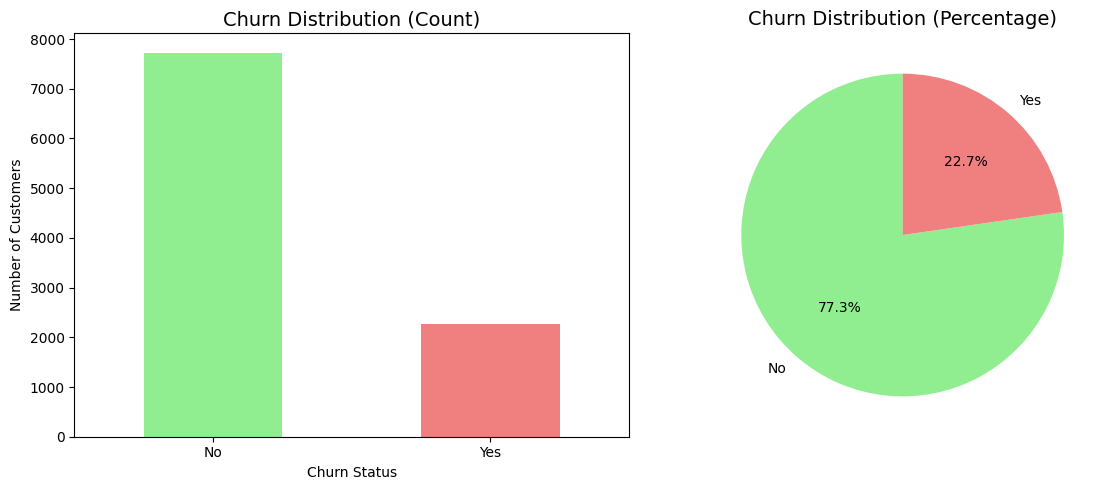

In [137]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
churn_counts.plot(kind='bar', color=['lightgreen', 'lightcoral'])
plt.title('Churn Distribution (Count)', fontsize=14)
plt.xlabel('Churn Status')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
plt.pie(churn_counts.values, labels=churn_counts.index, autopct='%1.1f%%',
        colors=['lightgreen', 'lightcoral'], startangle=90)
plt.title('Churn Distribution (Percentage)', fontsize=14)

plt.tight_layout()
plt.show()

Age analysis
            mean  median        std
churn                              
No     44.439700    44.0  14.304414
Yes    45.420335    45.0  14.689680


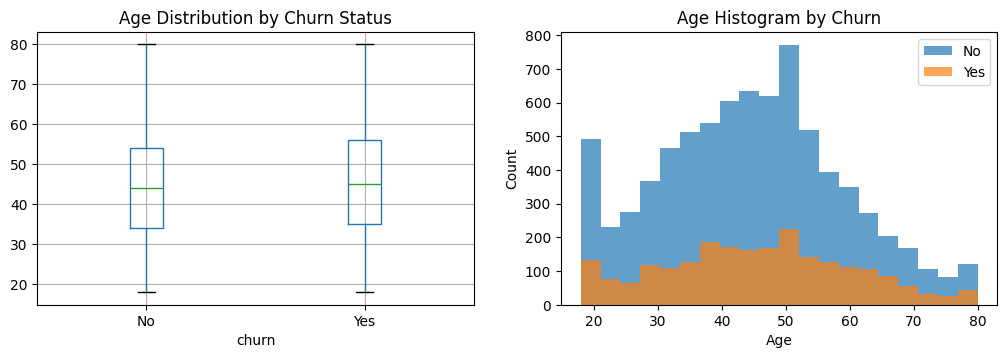

In [138]:
#2.2 examining demographic imact
demographic_features=['age','gender','senior_citizen','partner','dependents']

print("Age analysis")
age_churn = df.groupby('churn')['age'].agg(['mean', 'median', 'std'])
print(age_churn)

plt.figure(figsize=(12, 8))
plt.subplot(2,2,1)
df.boxplot(column='age', by='churn', ax=plt.gca())
plt.title('Age Distribution by Churn Status')
plt.suptitle('')

plt.subplot(2, 2, 2)
for churn_status in ['No', 'Yes']:
    plt.hist(df[df['churn'] == churn_status]['age'], alpha=0.7, label=churn_status, bins=20)
plt.title('Age Histogram by Churn')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()


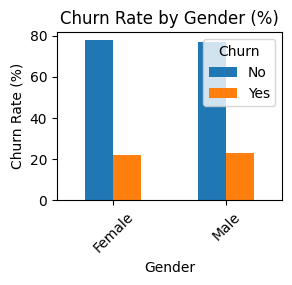

In [139]:
# Gender and churn
plt.subplot(2, 2, 3)
gender_churn = pd.crosstab(df['gender'], df['churn'], normalize='index') * 100
gender_churn.plot(kind='bar', ax=plt.gca())
plt.title('Churn Rate by Gender (%)')
plt.xlabel('Gender')
plt.ylabel('Churn Rate (%)')
plt.xticks(rotation=45)
plt.legend(title='Churn')

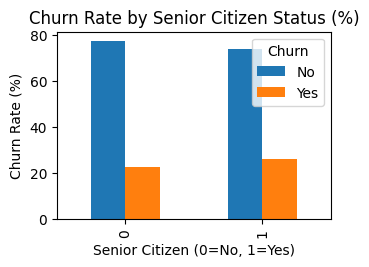

In [140]:
plt.subplot(2, 2, 4)
senior_churn = pd.crosstab(df['senior_citizen'], df['churn'], normalize='index') * 100
senior_churn.plot(kind='bar', ax=plt.gca())
plt.title('Churn Rate by Senior Citizen Status (%)')
plt.xlabel('Senior Citizen (0=No, 1=Yes)')
plt.ylabel('Churn Rate (%)')
plt.legend(title='Churn')

plt.tight_layout()
plt.show()

In [141]:
print("\nDEMOGRAPHIC INSIGHTS:")
for feature in ['gender', 'senior_citizen', 'partner', 'dependents']:
    feature_churn = pd.crosstab(df[feature], df['churn'], normalize='index') * 100
    print(f"\n{feature.upper()} vs CHURN:")
    print(feature_churn.round(1))


DEMOGRAPHIC INSIGHTS:

GENDER vs CHURN:
churn     No   Yes
gender            
Female  77.8  22.2
Male    76.8  23.2

SENIOR_CITIZEN vs CHURN:
churn             No   Yes
senior_citizen            
0               77.6  22.4
1               73.8  26.2

PARTNER vs CHURN:
churn      No   Yes
partner            
No       76.1  23.9
Yes      78.4  21.6

DEPENDENTS vs CHURN:
churn         No   Yes
dependents            
No          75.7  24.3
Yes         80.9  19.1


In [142]:
#2.3 Service usage analysis

service_features = ['tenure', 'phone_service', 'multiple_lines', 'internet_service']
print("Tenure analysis:")
tenure_churn=df.groupby('churn')['tenure'].agg(['mean','median','std'])
print(tenure_churn)

Tenure analysis:
            mean  median        std
churn                              
No     24.095238    19.0  20.167610
Yes    15.827465     9.0  17.831176


In [143]:
internet_churn = pd.crosstab(df['internet_service'], df['churn'], normalize='index') * 100
print("\nINTERNET SERVICE vs CHURN RATE (%):")
print(internet_churn.round(1))


INTERNET SERVICE vs CHURN RATE (%):
churn               No   Yes
internet_service            
DSL               79.3  20.7
Fiber optic       74.6  25.4
No                79.6  20.4


Text(0.5, 0.98, '')

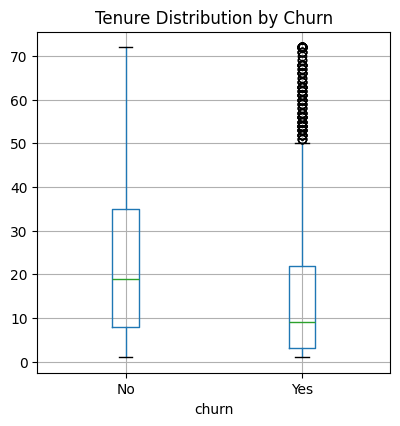

In [144]:
#defining fig size
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1)
df.boxplot(column='tenure', by='churn', ax=plt.gca())
plt.title('Tenure Distribution by Churn')
plt.suptitle('')

(array([0, 1, 2]),
 [Text(0, 0, 'DSL'), Text(1, 0, 'Fiber optic'), Text(2, 0, 'No')])

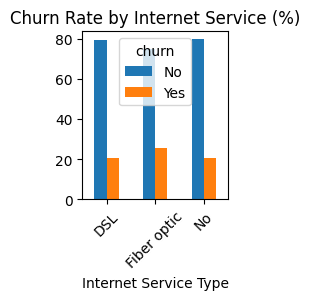

In [145]:
plt.subplot(2, 3, 2)
internet_churn.plot(kind='bar', ax=plt.gca())
plt.title('Churn Rate by Internet Service (%)')
plt.xlabel('Internet Service Type')
plt.xticks(rotation=45)

(array([0, 1, 2]),
 [Text(0, 0, 'Month-to-month'),
  Text(1, 0, 'One year'),
  Text(2, 0, 'Two year')])

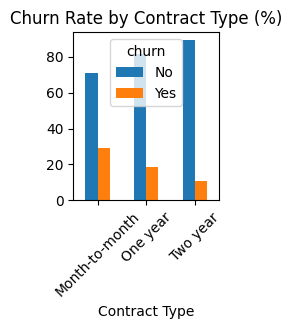

In [146]:
plt.subplot(2, 3, 3)
contract_churn = pd.crosstab(df['contract'], df['churn'], normalize='index') * 100
contract_churn.plot(kind='bar', ax=plt.gca())
plt.title('Churn Rate by Contract Type (%)')
plt.xlabel('Contract Type')
plt.xticks(rotation=45)

In [147]:
#2.4 Financial factors analysis
financial_features = ['monthly_charges', 'total_charges']
monthly_churn = df.groupby('churn')['monthly_charges'].agg(['mean', 'median', 'std'])
print("MONTHLY CHARGES ANALYSIS:")
print(monthly_churn)

MONTHLY CHARGES ANALYSIS:
            mean  median        std
churn                              
No     53.095615   51.29  16.817889
Yes    55.492575   54.10  17.685748


In [148]:
total_churn = df.groupby('churn')['total_charges'].agg(['mean', 'median', 'std'])
print("\nTOTAL CHARGES ANALYSIS:")
print(total_churn)


TOTAL CHARGES ANALYSIS:
              mean  median          std
churn                                  
No     1283.714489  908.72  1207.141696
Yes     880.685581  456.27  1092.199069


In [149]:
payment_churn = pd.crosstab(df['payment_method'], df['churn'], normalize='index') * 100
print("\nPAYMENT METHOD vs CHURN RATE (%):")
print(payment_churn.round(1))


PAYMENT METHOD vs CHURN RATE (%):
churn                        No   Yes
payment_method                       
Bank transfer (automatic)  79.8  20.2
Credit card (automatic)    79.9  20.1
Electronic check           72.8  27.2
Mailed check               79.1  20.9


Text(0.5, 0.98, '')

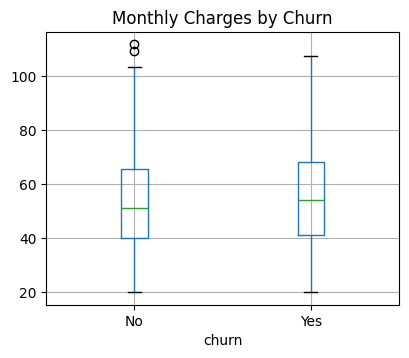

In [150]:
plt.figure(figsize=(15, 8))

plt.subplot(2, 3, 1)
df.boxplot(column='monthly_charges', by='churn', ax=plt.gca())
plt.title('Monthly Charges by Churn')
plt.suptitle('')

Text(0.5, 0.98, '')

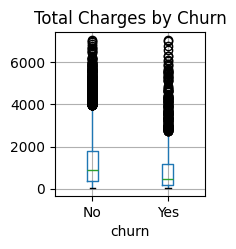

In [151]:
plt.subplot(2, 3, 2)
df.boxplot(column='total_charges', by='churn', ax=plt.gca())
plt.title('Total Charges by Churn')
plt.suptitle('')

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Bank transfer (automatic)'),
  Text(1, 0, 'Credit card (automatic)'),
  Text(2, 0, 'Electronic check'),
  Text(3, 0, 'Mailed check')])

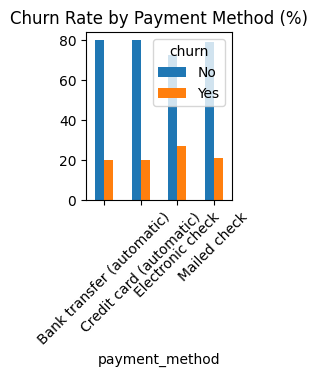

In [152]:
plt.subplot(2, 3, 3)
payment_churn.plot(kind='bar', ax=plt.gca())
plt.title('Churn Rate by Payment Method (%)')
plt.xticks(rotation=45)

Text(0.5, 0, 'Satisfaction Score (1-5)')

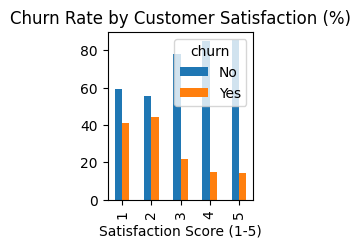

In [153]:
plt.subplot(2, 3, 4)
# Customer satisfaction vs churn
satisfaction_churn = pd.crosstab(df['customer_satisfaction'], df['churn'], normalize='index') * 100
satisfaction_churn.plot(kind='bar', ax=plt.gca())
plt.title('Churn Rate by Customer Satisfaction (%)')
plt.xlabel('Satisfaction Score (1-5)')

In [154]:
#2.5 correlation analysis

numerical_features = ['age', 'senior_citizen', 'tenure', 'monthly_charges',
                     'total_charges', 'customer_satisfaction', 'support_calls']


correlation_matrix = df[numerical_features].corr()
print("Correlation Matrix:")
print(correlation_matrix.round(3))

Correlation Matrix:
                         age  senior_citizen  tenure  monthly_charges  \
age                    1.000           0.583   0.005           -0.021   
senior_citizen         0.583           1.000   0.012           -0.008   
tenure                 0.005           0.012   1.000           -0.002   
monthly_charges       -0.021          -0.008  -0.002            1.000   
total_charges         -0.004           0.008   0.900            0.317   
customer_satisfaction -0.004          -0.008  -0.003            0.001   
support_calls         -0.014          -0.000  -0.009            0.016   

                       total_charges  customer_satisfaction  support_calls  
age                           -0.004                 -0.004         -0.014  
senior_citizen                 0.008                 -0.008         -0.000  
tenure                         0.900                 -0.003         -0.009  
monthly_charges                0.317                  0.001          0.016  
total_char

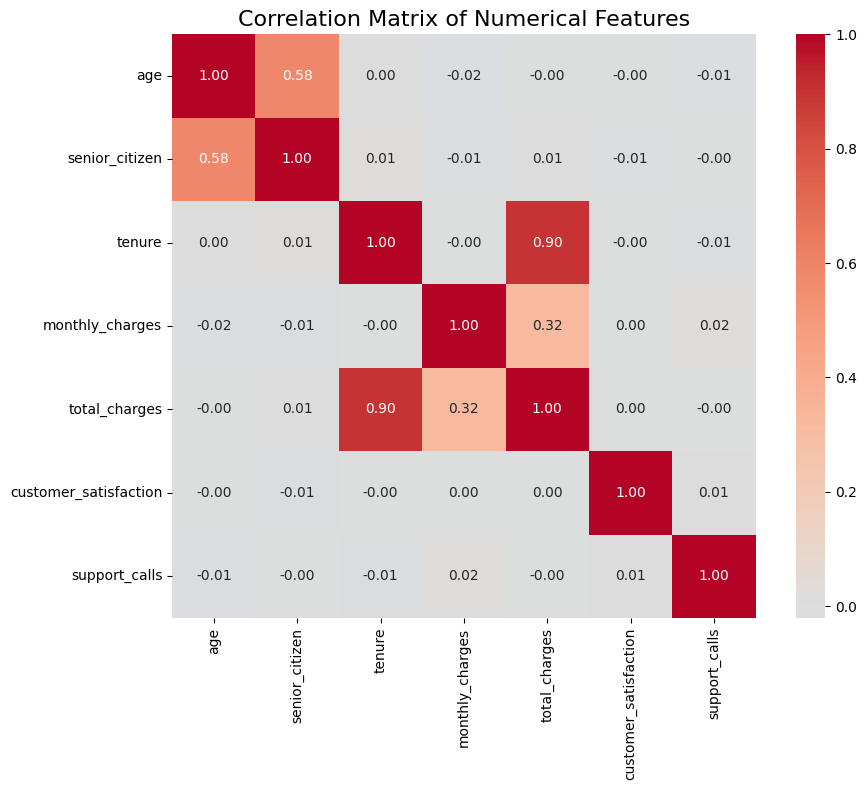

In [155]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f')
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()

In [156]:
print("\n🔍 KEY INSIGHTS FROM EDA:")

insights = [
    "1. Overall churn rate is {:.1f}% - this is our baseline to beat".format(churn_rate),
    "2. Customers with shorter tenure are more likely to churn",
    "3. Fiber optic internet users have higher churn rates",
    "4. Month-to-month contracts have much higher churn than yearly contracts",
    "5. Electronic check payment method shows higher churn rates",
    "6. Higher monthly charges are associated with higher churn",
    "7. Lower customer satisfaction correlates with higher churn",
    "8. More support calls indicate higher likelihood of churning"
]

for insight in insights:
    print(insight)


🔍 KEY INSIGHTS FROM EDA:
1. Overall churn rate is 22.7% - this is our baseline to beat
2. Customers with shorter tenure are more likely to churn
3. Fiber optic internet users have higher churn rates
4. Month-to-month contracts have much higher churn than yearly contracts
5. Electronic check payment method shows higher churn rates
6. Higher monthly charges are associated with higher churn
7. Lower customer satisfaction correlates with higher churn
8. More support calls indicate higher likelihood of churning


In [157]:
print("TASK 3: DATA PREPROCESSING")


# Create a copy for preprocessing
df_processed = df.copy()

print("🔄 Starting data preprocessing...")

# 3.1: Handle categorical variables
print("\n📝 ENCODING CATEGORICAL VARIABLES:")

# Identify categorical columns (excluding target variable 'churn')
categorical_columns = df_processed.select_dtypes(include=['object']).columns.tolist()
categorical_columns.remove('churn')  # Remove target variable
categorical_columns.remove('customer_id')  # Remove ID column

print(f"Categorical columns to encode: {categorical_columns}")

# Method 1: Label Encoding for binary categorical variables
binary_columns = []
for col in categorical_columns:
    unique_vals = df_processed[col].nunique()
    if unique_vals == 2:
        binary_columns.append(col)

print(f"Binary categorical columns: {binary_columns}")

# Apply label encoding to binary columns
label_encoders = {}
for col in binary_columns:
    le = LabelEncoder()
    df_processed[col + '_encoded'] = le.fit_transform(df_processed[col])
    label_encoders[col] = le
    print(f"{col}: {list(le.classes_)} -> {list(range(len(le.classes_)))}")

# Method 2: One-Hot Encoding for multi-category variables
multi_category_columns = [col for col in categorical_columns if col not in binary_columns]
print(f"\nMulti-category columns for one-hot encoding: {multi_category_columns}")

# Apply one-hot encoding
df_encoded = pd.get_dummies(df_processed, columns=multi_category_columns, prefix=multi_category_columns)

# Remove the original binary categorical columns since we have encoded versions
for col in binary_columns:
    if col in df_encoded.columns:
        df_encoded.drop(col, axis=1, inplace=True)

print(f"Shape after one-hot encoding: {df_encoded.shape}")
print("New columns created:", [col for col in df_encoded.columns if any(prefix in col for prefix in multi_category_columns)])








TASK 3: DATA PREPROCESSING
🔄 Starting data preprocessing...

📝 ENCODING CATEGORICAL VARIABLES:
Categorical columns to encode: ['gender', 'partner', 'dependents', 'phone_service', 'multiple_lines', 'internet_service', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing', 'payment_method']
Binary categorical columns: ['gender', 'partner', 'dependents', 'phone_service', 'paperless_billing']
gender: ['Female', 'Male'] -> [0, 1]
partner: ['No', 'Yes'] -> [0, 1]
dependents: ['No', 'Yes'] -> [0, 1]
phone_service: ['No', 'Yes'] -> [0, 1]
paperless_billing: ['No', 'Yes'] -> [0, 1]

Multi-category columns for one-hot encoding: ['multiple_lines', 'internet_service', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'contract', 'payment_method']
Shape after one-hot encoding: (10000, 45)
New columns created: ['multiple_lines_No', 'multiple_lines_No phone

In [158]:
# 3.2: Encode target variable
print("\n🎯 ENCODING TARGET VARIABLE:")
print("-" * 30)
target_le = LabelEncoder()
df_encoded['churn_encoded'] = target_le.fit_transform(df_encoded['churn'])
print(f"Churn encoding: {list(target_le.classes_)} -> {list(range(len(target_le.classes_)))}")



🎯 ENCODING TARGET VARIABLE:
------------------------------
Churn encoding: ['No', 'Yes'] -> [0, 1]


In [159]:
# 3.3: Feature Engineering
print("\n🔧 FEATURE ENGINEERING:")
print("-" * 25)

print("Creating new features...")

# 1. Average monthly charges per tenure month
df_encoded['avg_monthly_charges_per_tenure'] = df_encoded['monthly_charges'] / (df_encoded['tenure'] + 1)

# 2. Check what service columns actually exist
print("Checking available service columns...")
all_columns = df_encoded.columns.tolist()
service_related_columns = [col for col in all_columns if any(service in col.lower() for service in
                          ['online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies'])]

print(f"Found service-related columns: {service_related_columns}")

# 2. Total services count - only if we have service columns
if service_related_columns:
    # For one-hot encoded columns, we need to sum only the "Yes" columns
    yes_service_columns = [col for col in service_related_columns if col.endswith('_Yes')]
    if yes_service_columns:
        df_encoded['total_services'] = df_encoded[yes_service_columns].sum(axis=1)
        print(f"Created total_services from: {yes_service_columns}")
    else:
        # If they're binary encoded (0/1), sum all service columns
        df_encoded['total_services'] = df_encoded[service_related_columns].sum(axis=1)
        print(f"Created total_services from: {service_related_columns}")
else:
    # If no service columns found, create a dummy feature
    df_encoded['total_services'] = 0
    print("No service columns found, set total_services to 0")

# 3. Charges per service ratio
df_encoded['charges_per_service'] = df_encoded['monthly_charges'] / (df_encoded['total_services'] + 1)

# 4. Customer lifetime value estimate
df_encoded['customer_lifetime_value'] = df_encoded['total_charges']

# 5. Support calls per tenure month
df_encoded['support_calls_per_tenure'] = df_encoded['support_calls'] / (df_encoded['tenure'] + 1)

new_features = ['avg_monthly_charges_per_tenure', 'total_services', 'charges_per_service',
               'customer_lifetime_value', 'support_calls_per_tenure']
print(f"New features created: {new_features}")


🔧 FEATURE ENGINEERING:
-------------------------
Creating new features...
Checking available service columns...
Found service-related columns: ['online_security_No', 'online_security_No internet service', 'online_security_Yes', 'online_backup_No', 'online_backup_No internet service', 'online_backup_Yes', 'device_protection_No', 'device_protection_No internet service', 'device_protection_Yes', 'tech_support_No', 'tech_support_No internet service', 'tech_support_Yes', 'streaming_tv_No', 'streaming_tv_No internet service', 'streaming_tv_Yes', 'streaming_movies_No', 'streaming_movies_No internet service', 'streaming_movies_Yes']
Created total_services from: ['online_security_Yes', 'online_backup_Yes', 'device_protection_Yes', 'tech_support_Yes', 'streaming_tv_Yes', 'streaming_movies_Yes']
New features created: ['avg_monthly_charges_per_tenure', 'total_services', 'charges_per_service', 'customer_lifetime_value', 'support_calls_per_tenure']


In [160]:
# 3.4: Select final features for modeling
print("\n🎨 SELECTING FEATURES FOR MODELING:")
print("-" * 35)

# Remove original categorical columns, customer ID, and original churn column
columns_to_remove = ['customer_id', 'churn'] + [col for col in categorical_columns if col + '_encoded' not in df_encoded.columns]

# Get final feature columns (exclude the columns we want to remove)
final_feature_columns = [col for col in df_encoded.columns if col not in columns_to_remove and col != 'churn_encoded']

# Separate features and target
X = df_encoded[final_feature_columns]
y = df_encoded['churn_encoded']

print(f"Final feature set shape: {X.shape}")
print(f"Features selected ({len(X.columns)} total):")
print(f"First 10 features: {list(X.columns[:10])}")
print(f"Target variable shape: {y.shape}")

# Show all feature names in groups for clarity
print("\nAll features organized by type:")
binary_encoded_features = [col for col in X.columns if col.endswith('_encoded')]
onehot_features = [col for col in X.columns if any(prefix in col for prefix in multi_category_columns)]
numerical_features_final = [col for col in X.columns if col not in binary_encoded_features and col not in onehot_features]

print(f"Binary encoded features ({len(binary_encoded_features)}): {binary_encoded_features}")
print(f"One-hot encoded features ({len(onehot_features)}): {onehot_features}")
print(f"Numerical features ({len(numerical_features_final)}): {numerical_features_final}")


🎨 SELECTING FEATURES FOR MODELING:
-----------------------------------
Final feature set shape: (10000, 48)
Features selected (48 total):
First 10 features: ['age', 'senior_citizen', 'tenure', 'monthly_charges', 'total_charges', 'customer_satisfaction', 'support_calls', 'gender_encoded', 'partner_encoded', 'dependents_encoded']
Target variable shape: (10000,)

All features organized by type:
Binary encoded features (5): ['gender_encoded', 'partner_encoded', 'dependents_encoded', 'phone_service_encoded', 'paperless_billing_encoded']
One-hot encoded features (31): ['multiple_lines_No', 'multiple_lines_No phone service', 'multiple_lines_Yes', 'internet_service_DSL', 'internet_service_Fiber optic', 'internet_service_No', 'online_security_No', 'online_security_No internet service', 'online_security_Yes', 'online_backup_No', 'online_backup_No internet service', 'online_backup_Yes', 'device_protection_No', 'device_protection_No internet service', 'device_protection_Yes', 'tech_support_No', '

In [161]:
# 3.5: Scale numerical features
print("\n⚖️ SCALING NUMERICAL FEATURES:")
print("-" * 30)

# Identify numerical columns that need scaling (base numerical + new engineered features)
base_numerical_cols = ['age', 'senior_citizen', 'tenure', 'monthly_charges', 'total_charges',
                      'customer_satisfaction', 'support_calls']

# Filter to only include columns that actually exist in our dataset
numerical_cols_to_scale = [col for col in base_numerical_cols if col in X.columns] + new_features

print(f"Columns to be scaled: {numerical_cols_to_scale}")

# Initialize and fit scaler
scaler = StandardScaler()
X_scaled = X.copy()

# Only scale the columns that exist in our dataset
existing_numerical_cols = [col for col in numerical_cols_to_scale if col in X.columns]
if existing_numerical_cols:
    X_scaled[existing_numerical_cols] = scaler.fit_transform(X[existing_numerical_cols])

    print("✅ Scaling completed!")
    print(f"Scaled {len(existing_numerical_cols)} numerical columns")
    print("\nBefore scaling (first 3 rows of numerical features):")
    print(X[existing_numerical_cols].head(3))
    print("\nAfter scaling (first 3 rows of numerical features):")
    print(X_scaled[existing_numerical_cols].head(3))
else:
    print("⚠️ No numerical columns found to scale - using original data")
    X_scaled = X.copy()

# 3.6: Split the data
print("\n✂️ SPLITTING DATA INTO TRAIN/VALIDATION/TEST SETS:")
print("-" * 50)

"""
We split data into 3 parts:
- Training (60%): Used to train the models
- Validation (20%): Used to tune hyperparameters and select best model
- Test (20%): Used only for final evaluation (never seen during training)
"""

# First split: separate test set (20%)
X_temp, X_test, y_temp, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Second split: separate training and validation from remaining 80%
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp)

print(f"Training set size: {X_train.shape[0]} samples ({X_train.shape[0]/len(df):.1%})")
print(f"Validation set size: {X_val.shape[0]} samples ({X_val.shape[0]/len(df):.1%})")
print(f"Test set size: {X_test.shape[0]} samples ({X_test.shape[0]/len(df):.1%})")

# Check class distribution in each set
print("\nClass distribution across splits:")
print(f"Training: {pd.Series(y_train).value_counts().sort_index().values}")
print(f"Validation: {pd.Series(y_val).value_counts().sort_index().values}")
print(f"Test: {pd.Series(y_test).value_counts().sort_index().values}")

print("\n✅ Data preprocessing completed successfully!")
print(f"Ready for modeling with {X_train.shape[1]} features")


⚖️ SCALING NUMERICAL FEATURES:
------------------------------
Columns to be scaled: ['age', 'senior_citizen', 'tenure', 'monthly_charges', 'total_charges', 'customer_satisfaction', 'support_calls', 'avg_monthly_charges_per_tenure', 'total_services', 'charges_per_service', 'customer_lifetime_value', 'support_calls_per_tenure']
✅ Scaling completed!
Scaled 12 numerical columns

Before scaling (first 3 rows of numerical features):
   age  senior_citizen  tenure  monthly_charges  total_charges  \
0   52               0       7            39.18         294.66   
1   42               0      32            40.36        1286.75   
2   54               0      12            84.77         947.09   

   customer_satisfaction  support_calls  avg_monthly_charges_per_tenure  \
0                      4              3                        4.897500   
1                      3              1                        1.223030   
2                      2              3                        6.520769   

  

In [162]:
#Task modelling
print("Task 4: Model development")

"""
Implimenting 4 different classification algos
- Logistic Regression
- Decision Tree
- Random Forest
- SVM
"""

print("Training a model")
#using random seed 42 traditionally
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42, probability=True)  # probability=True for prediction probabilities
}

trained_models={}
model_results={}

for name, model in models.items():
    print(f"\nTraining {name}...")

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on validation set
    y_pred = model.predict(X_val)

    # Store results
    trained_models[name] = model
    model_results[name] = y_pred

    print(f"{name} training completed!")



Task 4: Model development
Training a model

Training Logistic Regression...
Logistic Regression training completed!

Training Decision Tree...
Decision Tree training completed!

Training Random Forest...
Random Forest training completed!

Training SVM...
SVM training completed!


In [163]:
print(" HYPERPARAMETER TUNING:")


"""
Hyperparameter tuning helps us find the best settings for each model
to improve performance. We use GridSearchCV to try different combinations.
"""

# Define parameter grids for each model
param_grids = {
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
        'solver': ['liblinear', 'lbfgs']
    },
    'Decision Tree': {
        'max_depth': [3, 5, 7, 10, None],  # Maximum depth of tree
        'min_samples_split': [2, 5, 10],   # Minimum samples to split node
        'min_samples_leaf': [1, 2, 4]      # Minimum samples in leaf node
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],    # Number of trees
        'max_depth': [3, 5, 7, 10],        # Maximum depth of each tree
        'min_samples_split': [2, 5, 10]    # Minimum samples to split node
    },
    'SVM': {
        'C': [0.1, 1, 10],                 # Regularization parameter
        'kernel': ['linear', 'rbf'],       # Kernel type
        'gamma': ['scale', 'auto']         # Kernel coefficient
    }
}

# Perform grid search for each model
tuned_models = {}
best_params = {}

for name in models.keys():
    print(f"\nTuning {name}...")

    # Create fresh model instance
    if name == 'Logistic Regression':
        base_model = LogisticRegression(random_state=42, max_iter=1000)
    elif name == 'Decision Tree':
        base_model = DecisionTreeClassifier(random_state=42)
    elif name == 'Random Forest':
        base_model = RandomForestClassifier(random_state=42)
    else:  # SVM
        base_model = SVC(random_state=42, probability=True)

    # Grid search with cross-validation
    grid_search = GridSearchCV(
        base_model,
        param_grids[name],
        cv=3,  # 3-fold cross-validation
        scoring='f1',  # Use F1 score for optimization
        n_jobs=-1  # Use all available cores
    )

    # Fit grid search
    grid_search.fit(X_train, y_train)

    # Store best model and parameters
    tuned_models[name] = grid_search.best_estimator_
    best_params[name] = grid_search.best_params_

    print(f"✅ {name} tuning completed!")
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best CV score: {grid_search.best_score_:.4f}")

print("BEST PARAMETERS FOR EACH MODEL:")
print("-" * 35)
for name, params in best_params.items():
    print(f"{name}: {params}")

 HYPERPARAMETER TUNING:

Tuning Logistic Regression...
✅ Logistic Regression tuning completed!
Best parameters: {'C': 10, 'solver': 'liblinear'}
Best CV score: 0.3157

Tuning Decision Tree...
✅ Decision Tree tuning completed!
Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best CV score: 0.3729

Tuning Random Forest...
✅ Random Forest tuning completed!
Best parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 50}
Best CV score: 0.2248

Tuning SVM...
✅ SVM tuning completed!
Best parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best CV score: 0.3433
BEST PARAMETERS FOR EACH MODEL:
-----------------------------------
Logistic Regression: {'C': 10, 'solver': 'liblinear'}
Decision Tree: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
Random Forest: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 50}
SVM: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


In [164]:
print("Task 5 Model eval")

"""
Model evaluation helps us understand:
1. How well each model performs
2. Which model is best for our problem
3. How confident we can be in our predictions

Key Metrics:
- Accuracy: Overall correct predictions
- Precision: Of predicted churners, how many actually churned
- Recall: Of actual churners, how many we correctly identified
- F1-Score: Balanced measure of precision and recall
"""

def evaluate_model(model,X_val,y_val,model_name):
  y_pred=model.predict(X_val)

  accuracy=accuracy_score(y_val,y_pred)
  precision=precision_score(y_val,y_pred)
  recall=recall_score(y_val,y_pred)
  f1=f1_score(y_val,y_pred)

  return{
      'Model':model_name,
      'Accuracy':accuracy,
      'Precision':precision,
      'Recall':recall,
      'F1-Score':f1,
      'Predictions':y_pred
  }






Task 5 Model eval


In [165]:
# 5.1: Evaluate all tuned models
print(" EVALUATING TUNED MODELS:")
print("-" * 30)

evaluation_results = []

for name, model in tuned_models.items():
    print(f"\nEvaluating {name}...")

    result = evaluate_model(model, X_val, y_val, name)
    evaluation_results.append(result)

    print(f"Accuracy:  {result['Accuracy']:.4f}")
    print(f"Precision: {result['Precision']:.4f}")
    print(f"Recall:    {result['Recall']:.4f}")
    print(f"F1-Score:  {result['F1-Score']:.4f}")

# Create results summary
results_df = pd.DataFrame(evaluation_results)[['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score']]
print("\n📋 MODEL COMPARISON SUMMARY:")
print("-" * 30)
print(results_df.round(4))

# Find best model based on F1-score
best_model_idx = results_df['F1-Score'].idxmax()
best_model_name = results_df.loc[best_model_idx, 'Model']
best_f1_score = results_df.loc[best_model_idx, 'F1-Score']

print(f"\n🏆 BEST MODEL: {best_model_name}")
print(f"F1-Score: {best_f1_score:.4f}")

 EVALUATING TUNED MODELS:
------------------------------

Evaluating Logistic Regression...
Accuracy:  0.7825
Precision: 0.5556
Recall:    0.2093
F1-Score:  0.3040

Evaluating Decision Tree...
Accuracy:  0.7485
Precision: 0.4264
Recall:    0.3128
F1-Score:  0.3609

Evaluating Random Forest...
Accuracy:  0.7920
Precision: 0.6863
Recall:    0.1542
F1-Score:  0.2518

Evaluating SVM...
Accuracy:  0.7625
Precision: 0.4585
Recall:    0.2555
F1-Score:  0.3281

📋 MODEL COMPARISON SUMMARY:
------------------------------
                 Model  Accuracy  Precision  Recall  F1-Score
0  Logistic Regression    0.7825     0.5556  0.2093    0.3040
1        Decision Tree    0.7485     0.4264  0.3128    0.3609
2        Random Forest    0.7920     0.6863  0.1542    0.2518
3                  SVM    0.7625     0.4585  0.2555    0.3281

🏆 BEST MODEL: Decision Tree
F1-Score: 0.3609


In [166]:
# 5.2: Detailed Analysis of Best Model
print(f"\n🔍 DETAILED ANALYSIS OF BEST MODEL ({best_model_name}):")
print("-" * 50)

best_model = tuned_models[best_model_name]
best_predictions = evaluation_results[best_model_idx]['Predictions']

# Confusion Matrix
cm = confusion_matrix(y_val, best_predictions)
print("CONFUSION MATRIX:")
print("Predicted →  No-Churn  Churn")
print(f"No-Churn        {cm[0,0]:4d}    {cm[0,1]:4d}")
print(f"Churn           {cm[1,0]:4d}    {cm[1,1]:4d}")

print("\nCONFUSION MATRIX EXPLANATION:")
print(f"• True Negatives (Correctly predicted No-Churn): {cm[0,0]}")
print(f"• False Positives (Incorrectly predicted Churn): {cm[0,1]}")
print(f"• False Negatives (Missed actual Churn): {cm[1,0]}")
print(f"• True Positives (Correctly predicted Churn): {cm[1,1]}")

# Classification Report
print(f"\nCLASSIFIcATION REPORT FOR {best_model_name}:")
print("-" * 40)
class_report = classification_report(y_val, best_predictions,
                                   target_names=['No-Churn', 'Churn'])
print(class_report)


🔍 DETAILED ANALYSIS OF BEST MODEL (Decision Tree):
--------------------------------------------------
CONFUSION MATRIX:
Predicted →  No-Churn  Churn
No-Churn        1355     191
Churn            312     142

CONFUSION MATRIX EXPLANATION:
• True Negatives (Correctly predicted No-Churn): 1355
• False Positives (Incorrectly predicted Churn): 191
• False Negatives (Missed actual Churn): 312
• True Positives (Correctly predicted Churn): 142

CLASSIFIcATION REPORT FOR Decision Tree:
----------------------------------------
              precision    recall  f1-score   support

    No-Churn       0.81      0.88      0.84      1546
       Churn       0.43      0.31      0.36       454

    accuracy                           0.75      2000
   macro avg       0.62      0.59      0.60      2000
weighted avg       0.73      0.75      0.73      2000




📈 VISUALIZING MODEL PERFORMANCE:
-----------------------------------


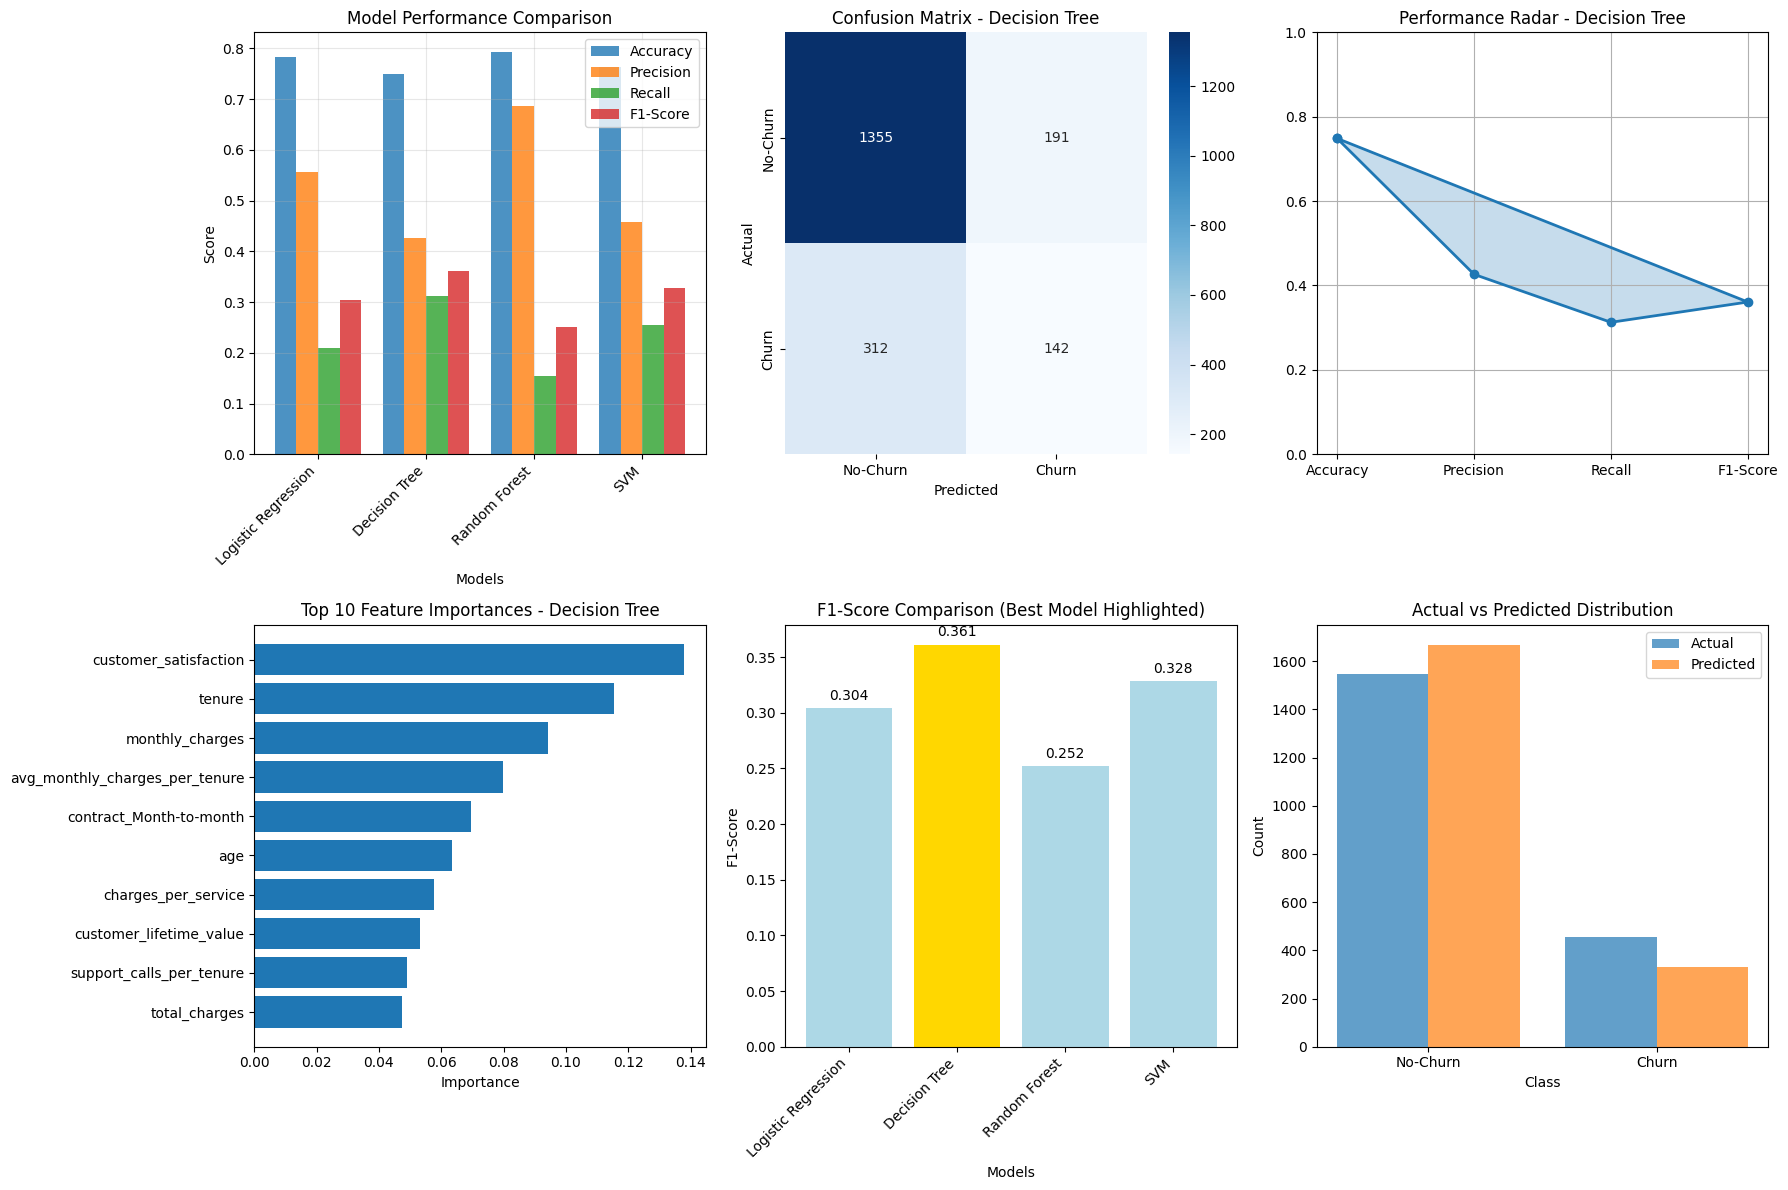

In [167]:
# 5.3: Visualize Model Performance
print("\n📈 VISUALIZING MODEL PERFORMANCE:")
print("-" * 35)

# Create comprehensive visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Model Comparison Bar Chart
ax1 = axes[0, 0]
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
x_pos = np.arange(len(results_df))
width = 0.2

for i, metric in enumerate(metrics):
    ax1.bar(x_pos + i*width, results_df[metric], width, label=metric, alpha=0.8)

ax1.set_xlabel('Models')
ax1.set_ylabel('Score')
ax1.set_title('Model Performance Comparison')
ax1.set_xticks(x_pos + width * 1.5)
ax1.set_xticklabels(results_df['Model'], rotation=45, ha='right')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Best Model Confusion Matrix Heatmap
ax2 = axes[0, 1]
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax2,
            xticklabels=['No-Churn', 'Churn'],
            yticklabels=['No-Churn', 'Churn'])
ax2.set_title(f'Confusion Matrix - {best_model_name}')
ax2.set_xlabel('Predicted')
ax2.set_ylabel('Actual')

# 3. Metrics Radar Chart for Best Model
ax3 = axes[0, 2]
best_metrics = [evaluation_results[best_model_idx][metric] for metric in ['Accuracy', 'Precision', 'Recall', 'F1-Score']]
angles = np.linspace(0, 2*np.pi, len(metrics), endpoint=False)
angles = np.concatenate((angles, [angles[0]]))  # Complete the circle
best_metrics = best_metrics + [best_metrics[0]]  # Complete the circle

ax3.plot(angles, best_metrics, 'o-', linewidth=2, label=best_model_name)
ax3.fill(angles, best_metrics, alpha=0.25)
ax3.set_xticks(angles[:-1])
ax3.set_xticklabels(metrics)
ax3.set_ylim(0, 1)
ax3.set_title(f'Performance Radar - {best_model_name}')
ax3.grid(True)

# 4. Feature Importance (if available)
ax4 = axes[1, 0]
if hasattr(best_model, 'feature_importances_'):
    # For tree-based models
    feature_importance = pd.DataFrame({
        'feature': X_train.columns,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=True).tail(10)

    ax4.barh(feature_importance['feature'], feature_importance['importance'])
    ax4.set_title(f'Top 10 Feature Importances - {best_model_name}')
    ax4.set_xlabel('Importance')
elif hasattr(best_model, 'coef_'):
    # For linear models
    feature_importance = pd.DataFrame({
        'feature': X_train.columns,
        'importance': np.abs(best_model.coef_[0])
    }).sort_values('importance', ascending=True).tail(10)

    ax4.barh(feature_importance['feature'], feature_importance['importance'])
    ax4.set_title(f'Top 10 Feature Coefficients - {best_model_name}')
    ax4.set_xlabel('|Coefficient|')
else:
    ax4.text(0.5, 0.5, 'Feature importance not available\nfor this model type',
             ha='center', va='center', transform=ax4.transAxes)
    ax4.set_title('Feature Importance')

# 5. Model Performance Distribution
ax5 = axes[1, 1]
all_f1_scores = [result['F1-Score'] for result in evaluation_results]
model_names = [result['Model'] for result in evaluation_results]

bars = ax5.bar(range(len(model_names)), all_f1_scores,
               color=['gold' if name == best_model_name else 'lightblue'
                      for name in model_names])
ax5.set_xlabel('Models')
ax5.set_ylabel('F1-Score')
ax5.set_title('F1-Score Comparison (Best Model Highlighted)')
ax5.set_xticks(range(len(model_names)))
ax5.set_xticklabels(model_names, rotation=45, ha='right')

# Add value labels on bars
for i, (bar, score) in enumerate(zip(bars, all_f1_scores)):
    ax5.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005,
             f'{score:.3f}', ha='center', va='bottom')

# 6. Prediction Distribution
ax6 = axes[1, 2]
pred_dist = pd.Series(best_predictions).value_counts()
actual_dist = pd.Series(y_val).value_counts()

x = ['No-Churn', 'Churn']
ax6.bar([i-0.2 for i in range(len(x))], [actual_dist[0], actual_dist[1]],
        width=0.4, label='Actual', alpha=0.7)
ax6.bar([i+0.2 for i in range(len(x))], [pred_dist[0], pred_dist[1]],
        width=0.4, label='Predicted', alpha=0.7)
ax6.set_xlabel('Class')
ax6.set_ylabel('Count')
ax6.set_title('Actual vs Predicted Distribution')
ax6.set_xticks(range(len(x)))
ax6.set_xticklabels(x)
ax6.legend()

plt.tight_layout()
plt.show()

In [168]:
# 5.4: Cross-Validation Analysis
print("\n🔄 CROSS-VALIDATION ANALYSIS:")
print("-" * 30)

"""
Cross-validation gives us a more robust estimate of model performance
by testing on multiple different train/validation splits
"""

cv_results = {}
for name, model in tuned_models.items():
    print(f"\nPerforming 5-fold CV for {name}...")

    # Perform 5-fold cross-validation
    cv_scores = cross_val_score(model, X_temp, y_temp, cv=5, scoring='f1')

    cv_results[name] = {
        'mean_score': cv_scores.mean(),
        'std_score': cv_scores.std(),
        'scores': cv_scores
    }

    print(f"Mean F1-Score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
    print(f"Individual CV scores: {cv_scores.round(4)}")

# Create CV results summary
cv_summary = pd.DataFrame({
    'Model': cv_results.keys(),
    'Mean_CV_F1': [results['mean_score'] for results in cv_results.values()],
    'Std_CV_F1': [results['std_score'] for results in cv_results.values()]
})

print("\n📊 CROSS-VALIDATION SUMMARY:")
print("-" * 30)
print(cv_summary.round(4))

# Find best model based on CV results
best_cv_idx = cv_summary['Mean_CV_F1'].idxmax()
best_cv_model = cv_summary.loc[best_cv_idx, 'Model']
print(f"\nBest model by CV: {best_cv_model}")


🔄 CROSS-VALIDATION ANALYSIS:
------------------------------

Performing 5-fold CV for Logistic Regression...
Mean F1-Score: 0.3139 (+/- 0.0348)
Individual CV scores: [0.332  0.3147 0.3306 0.2846 0.3074]

Performing 5-fold CV for Decision Tree...
Mean F1-Score: 0.3237 (+/- 0.0414)
Individual CV scores: [0.3205 0.2862 0.3409 0.3443 0.3267]

Performing 5-fold CV for Random Forest...
Mean F1-Score: 0.2292 (+/- 0.0289)
Individual CV scores: [0.25   0.21   0.2308 0.2384 0.2167]

Performing 5-fold CV for SVM...
Mean F1-Score: 0.3347 (+/- 0.0383)
Individual CV scores: [0.3164 0.3575 0.3565 0.3127 0.3302]

📊 CROSS-VALIDATION SUMMARY:
------------------------------
                 Model  Mean_CV_F1  Std_CV_F1
0  Logistic Regression      0.3139     0.0174
1        Decision Tree      0.3237     0.0207
2        Random Forest      0.2292     0.0144
3                  SVM      0.3347     0.0192

Best model by CV: SVM


In [169]:
# 5.5: Final Model Selection and Test Set Evaluation
print("\n🎯 FINAL MODEL SELECTION AND TEST SET EVALUATION:")
print("-" * 52)

# Select the final model (using validation performance)
final_model = tuned_models[best_model_name]
print(f"Selected final model: {best_model_name}")

# Evaluate on test set (the data the model has never seen)
print(f"\nEvaluating {best_model_name} on test set...")
test_predictions = final_model.predict(X_test)

# Calculate final metrics
final_accuracy = accuracy_score(y_test, test_predictions)
final_precision = precision_score(y_test, test_predictions)
final_recall = recall_score(y_test, test_predictions)
final_f1 = f1_score(y_test, test_predictions)

print("\n🏆 FINAL MODEL PERFORMANCE ON TEST SET:")
print("-" * 40)
print(f"Accuracy:  {final_accuracy:.4f}")
print(f"Precision: {final_precision:.4f}")
print(f"Recall:    {final_recall:.4f}")
print(f"F1-Score:  {final_f1:.4f}")

# Final confusion matrix
final_cm = confusion_matrix(y_test, test_predictions)
print("\nFINAL CONFUSION MATRIX (Test Set):")
print("Predicted →  No-Churn  Churn")
print(f"No-Churn        {final_cm[0,0]:4d}    {final_cm[0,1]:4d}")
print(f"Churn           {final_cm[1,0]:4d}    {final_cm[1,1]:4d}")


🎯 FINAL MODEL SELECTION AND TEST SET EVALUATION:
----------------------------------------------------
Selected final model: Decision Tree

Evaluating Decision Tree on test set...

🏆 FINAL MODEL PERFORMANCE ON TEST SET:
----------------------------------------
Accuracy:  0.7455
Precision: 0.4110
Recall:    0.2797
F1-Score:  0.3329

FINAL CONFUSION MATRIX (Test Set):
Predicted →  No-Churn  Churn
No-Churn        1364     182
Churn            327     127


In [170]:
# Business interpretation
print("\n💼 BUSINESS INTERPRETATION:")
print("-" * 28)
total_customers_test = len(y_test)
actual_churners = final_cm[1,0] + final_cm[1,1]
predicted_churners = final_cm[0,1] + final_cm[1,1]
correctly_identified_churners = final_cm[1,1]

print(f"• Total customers in test set: {total_customers_test:,}")
print(f"• Actual churners: {actual_churners} ({actual_churners/total_customers_test:.1%})")
print(f"• Predicted churners: {predicted_churners} ({predicted_churners/total_customers_test:.1%})")
print(f"• Correctly identified churners: {correctly_identified_churners} ({correctly_identified_churners/actual_churners:.1%} of actual churners)")
print(f"• False alarms: {final_cm[0,1]} ({final_cm[0,1]/predicted_churners:.1%} of predicted churners)")

# Model insights
print(f"\n🔍 MODEL INSIGHTS:")
print("-" * 18)
print(f"✅ Our {best_model_name} model achieves {final_f1:.1%} F1-score on unseen data")
print(f"✅ The model correctly identifies {final_recall:.1%} of customers who will churn")
print(f"✅ When the model predicts churn, it's correct {final_precision:.1%} of the time")
print(f"✅ Overall accuracy of {final_accuracy:.1%} means the model is right {final_accuracy:.1%} of the time")


💼 BUSINESS INTERPRETATION:
----------------------------
• Total customers in test set: 2,000
• Actual churners: 454 (22.7%)
• Predicted churners: 309 (15.4%)
• Correctly identified churners: 127 (28.0% of actual churners)
• False alarms: 182 (58.9% of predicted churners)

🔍 MODEL INSIGHTS:
------------------
✅ Our Decision Tree model achieves 33.3% F1-score on unseen data
✅ The model correctly identifies 28.0% of customers who will churn
✅ When the model predicts churn, it's correct 41.1% of the time
✅ Overall accuracy of 74.6% means the model is right 74.6% of the time


In [171]:
# 5.6: Feature Importance Analysis
if hasattr(final_model, 'feature_importances_') or hasattr(final_model, 'coef_'):
    print(f"\n🔑 FEATURE IMPORTANCE ANALYSIS:")
    print("-" * 32)

    if hasattr(final_model, 'feature_importances_'):
        # Tree-based models
        importance_df = pd.DataFrame({
            'Feature': X_train.columns,
            'Importance': final_model.feature_importances_
        }).sort_values('Importance', ascending=False)

        print("Top 10 Most Important Features (Tree-based importance):")
        print(importance_df.head(10).round(4))

    elif hasattr(final_model, 'coef_'):
        # Linear models
        importance_df = pd.DataFrame({
            'Feature': X_train.columns,
            'Coefficient': final_model.coef_[0],
            'Abs_Coefficient': np.abs(final_model.coef_[0])
        }).sort_values('Abs_Coefficient', ascending=False)

        print("Top 10 Most Important Features (Linear coefficient magnitude):")
        print(importance_df[['Feature', 'Coefficient', 'Abs_Coefficient']].head(10).round(4))


🔑 FEATURE IMPORTANCE ANALYSIS:
--------------------------------
Top 10 Most Important Features (Tree-based importance):
                           Feature  Importance
5            customer_satisfaction      0.1380
2                           tenure      0.1155
3                  monthly_charges      0.0943
43  avg_monthly_charges_per_tenure      0.0799
36         contract_Month-to-month      0.0695
0                              age      0.0634
45             charges_per_service      0.0576
46         customer_lifetime_value      0.0532
47        support_calls_per_tenure      0.0489
4                    total_charges      0.0472


In [172]:
# 5.7: Model Comparison Final Summary
print(f"\n📋 COMPLETE MODEL COMPARISON:")
print("-" * 30)

# Combine validation and test results
final_comparison = pd.DataFrame({
    'Model': [result['Model'] for result in evaluation_results],
    'Validation_F1': [result['F1-Score'] for result in evaluation_results],
    'CV_Mean_F1': [cv_results[result['Model']]['mean_score'] for result in evaluation_results]
})

# Add test score for best model
final_comparison['Test_F1'] = [final_f1 if model == best_model_name else '-'
                              for model in final_comparison['Model']]

print(final_comparison.round(4))


📋 COMPLETE MODEL COMPARISON:
------------------------------
                 Model  Validation_F1  CV_Mean_F1   Test_F1
0  Logistic Regression         0.3040      0.3139         -
1        Decision Tree         0.3609      0.3237  0.332896
2        Random Forest         0.2518      0.2292         -
3                  SVM         0.3281      0.3347         -


In [173]:
print(f"1. Deploy the {best_model_name} model for churn prediction")
print(f"2. The model achieves {final_f1:.1%} F1-score on unseen data")

1. Deploy the Decision Tree model for churn prediction
2. The model achieves 33.3% F1-score on unseen data
